In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from adjustText import adjust_text 
import statsmodels.api as sm
from scipy.stats import ttest_1samp, ttest_ind
import statsmodels.stats.multitest as mt

In [2]:
FUUR1 = pd.read_csv("../datasets/tRCC_cell_lines/MAGeCK_output/FUUR1_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)
STFE = pd.read_csv("../datasets/tRCC_cell_lines/MAGeCK_output/STFE_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)
UOK109 = pd.read_csv("../datasets/tRCC_cell_lines/MAGeCK_output/UOK109_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)
# UOK146 = pd.read_csv("../datasets/tRCC_cell_lines/MAGeCK_output/UOK146_d28_vs_pDNA.gene_summary.txt", sep="\t").set_index('id', inplace=False)

def commonCols(df1, df2):
    return df1.columns.intersection(df2.columns)

def combine_DFs_col(dfs, column_name, new_column_names):
    
    result = dfs[0][[column_name]].copy()
    
    for df in dfs[1:]:
        result = result.merge(df[[column_name]], left_index=True, right_index=True, how='inner')
    
    result.columns = new_column_names

    return result

tRCC_comb_MAGeCK_qVal = combine_DFs_col([FUUR1, STFE, UOK109], "neg|fdr", ["FUUR1", "STFE", "UOK109"])
tRCC_comb_MAGeCK_geneScore = combine_DFs_col([FUUR1, STFE, UOK109], "neg|score", ["FUUR1", "STFE", "UOK109"])

mean_tRCC_MAGeCK_qVal = tRCC_comb_MAGeCK_qVal.mean(axis=1)
mean_tRCC_MAGeCK_geneScore = tRCC_comb_MAGeCK_geneScore.mean(axis=1)

In [3]:
FUUR1

,num,neg|score,neg|p-value,neg|fdr,neg|rank,neg|goodsgrna,neg|lfc,pos|score,pos|p-value,pos|fdr,pos|rank,pos|goodsgrna,pos|lfc
id,,,,,,,,,,,,,
HSPA5,4,1.299300e-10,2.366200e-07,0.000261,1,4,-3.83120,1.000000e+00,1.000000e+00,1.000000,20922,0,-3.83120
RPS16,4,4.282000e-10,2.366200e-07,0.000261,2,4,-3.45840,1.000000e+00,1.000000e+00,1.000000,20838,0,-3.45840
FAU,4,1.578800e-09,2.366200e-07,0.000261,3,4,-3.37700,1.000000e+00,1.000000e+00,1.000000,20921,0,-3.37700
RPL7,4,2.992800e-09,2.366200e-07,0.000261,4,4,-2.76380,1.000000e+00,1.000000e+00,1.000000,20920,0,-2.76380
LUC7L3,4,6.144200e-09,2.366200e-07,0.000261,5,4,-3.01840,1.000000e+00,1.000000e+00,1.000000,20919,0,-3.01840
...,...,...,...,...,...,...,...,...,...,...,...,...,...
TMSB4Y,4,9.999400e-01,9.999400e-01,1.000000,20918,0,0.81519,5.581400e-05,2.122500e-04,0.354125,10,4,0.81519
VSX1,4,9.999600e-01,9.999500e-01,1.000000,20919,0,0.81552,4.423900e-05,1.672900e-04,0.350000,8,4,0.81552
POTENTIALLY_ACTIVE_129,1,9.999800e-01,9.999800e-01,1.000000,20920,0,1.90410,1.951500e-05,1.774600e-05,0.123762,4,1,1.90410


In [5]:
tRCC_MAGeCK_sig_df = mean_tRCC_MAGeCK_qVal[mean_tRCC_MAGeCK_qVal < 0.05]

print("Number of significant genes (q<0.05) tested by MAGeCK algorithm: {0}".format(len(tRCC_MAGeCK_sig_df.index)))

Number of significant genes (q<0.05) tested by MAGeCK algorithm: 830


In [6]:
bmi751_chronos_dataset = pd.read_csv("/Users/harshel/Documents/harvard/BMI751_capstone/datasets/tRCC_cell_lines/Chronos/tRCC_chronos_summary_for_BL_ASPS_updated.csv").set_index('Gene')
ccl_chronos_dataset = bmi751_chronos_dataset[["PC3", "CAKI2", "CAKI1", "786O", "DU145", "HCT116", "NCIH460", "FUUR1", "STFE", "UOK109"]]
ccl_chronos_dataset

,PC3,CAKI2,CAKI1,786O,DU145,HCT116,NCIH460,FUUR1,STFE,UOK109
Gene,,,,,,,,,,
A1BG,0.017377,0.173071,-0.212095,-0.204959,0.087227,0.204475085,-0.12011964,0.021711582,-0.012644102,0.019238358
A1CF,-0.224036,-0.064502,0.025230,-0.052818,-0.046054,-0.052868969,-0.01519644,0.086697332,0.00564054,0.092212665
A2M,-0.089727,-0.063877,0.162061,-0.036369,0.042095,0.090832237,0.031387216,-0.082493258,-0.017527295,-0.060881558
A2ML1,-0.048324,0.074182,0.069329,0.076836,0.200913,-0.095262725,0.074873346,-0.13233965,0.020926774,-0.265367641
A3GALT2,-0.105465,-0.092830,-0.078785,-0.013163,-0.015387,-0.080493674,-0.073188494,0.020231174,-0.051885878,0.116947189
...,...,...,...,...,...,...,...,...,...,...
ZYG11A,0.129286,0.037725,-0.109925,-0.006306,-0.012157,0.114928814,0.080161334,-0.124612928,-0.087376275,0.020960888
ZYG11B,-0.205720,-0.269112,0.031072,-0.196235,-0.265347,-0.353278818,-0.021248411,0.007483915,-0.024138153,0.059527299
ZYX,-0.102268,0.085625,-0.090119,-0.290291,0.032035,0.033598362,-0.242508353,-0.251480544,0.105013525,-0.155353998


In [7]:
ccl_chronos_dataset = ccl_chronos_dataset[~(ccl_chronos_dataset == 'Unknown').any(axis=1)].apply(pd.to_numeric, errors='coerce').dropna()

### tRCC Chronos Score Analysis
tRCC_chronos_gene_effects = ccl_chronos_dataset[["FUUR1", "STFE", "UOK109"]]
mean_tRCC_chronos_gene_effects = tRCC_chronos_gene_effects.mean(axis=1)

# ### ccRCC Chronos Score Analysis
ccRCC_chronos_gene_effects = ccl_chronos_dataset[["PC3", "CAKI2", "CAKI1", "786O", "DU145", "HCT116", "NCIH460"]]
mean_ccRCC_chronos_gene_effects = ccRCC_chronos_gene_effects.mean(axis=1)

def compute_p_values_and_fdr(df1, df2):

    assert all(df1.index == df2.index), "Genes in both dataframes must be in the same order"
    
    p_values = []
    for gene in df1.index:
        _, p_value = ttest_ind(df1.loc[gene], df2.loc[gene], equal_var=False)
        p_values.append(p_value)
    
    _, p_values_adj, _, _ = mt.multipletests(p_values, method='fdr_bh')
    
    result_df = pd.DataFrame({
        'p_val': p_values,
        'q_val(FDR)': p_values_adj
    }, index=df1.index)
    
    return result_df

tRCC_pVals = compute_p_values_and_fdr(tRCC_chronos_gene_effects, ccRCC_chronos_gene_effects)
tRCC_pVals["Significant"] = tRCC_pVals["q_val(FDR)"] < 0.05
tRCC_pVals

,p_val,q_val(FDR),Significant
Gene,,,
A1BG,0.803085,0.893648,False
A1CF,0.021814,0.142566,False
A2M,0.096604,0.292063,False
A2ML1,0.152695,0.366434,False
A3GALT2,0.187317,0.406925,False
...,...,...,...
ZYG11A,0.141908,0.353546,False
ZYG11B,0.009700,0.094888,False
ZYX,0.885825,0.940474,False


In [8]:
tRCC_chronos_sig = tRCC_pVals[tRCC_pVals['Significant'] == True]

print("Number of significant genes: {0}\n".format(len(tRCC_chronos_sig)))

genesCheck = ["MVK", "ATP5F1E", "HSCB", "FDX2", "ATP5F1A", "ATP5F1D", "ATP5PD", "ISCA1", "MVD", "PMVK", "DLST", "ISCA2", "SDHB", "TFE3", "ATP5ME", "SDHA", "ATP5PO", "UQCRQ"]

def checkGenes(genesCheck, df):

    checkedGenes = {}
    for gene in genesCheck:
        if gene in df.index:
            checkedGenes[gene] = True
        else:
            checkedGenes[gene] = False
    
    return checkedGenes

checkGenes(genesCheck=genesCheck, df=tRCC_chronos_sig)


Number of significant genes: 883



{'MVK': True,
 'ATP5F1E': False,
 'HSCB': False,
 'FDX2': True,
 'ATP5F1A': True,
 'ATP5F1D': True,
 'ATP5PD': True,
 'ISCA1': True,
 'MVD': True,
 'PMVK': True,
 'DLST': False,
 'ISCA2': True,
 'SDHB': False,
 'TFE3': True,
 'ATP5ME': True,
 'SDHA': False,
 'ATP5PO': False,
 'UQCRQ': False}

In [9]:
delta_chronos = mean_tRCC_chronos_gene_effects - mean_ccRCC_chronos_gene_effects
delta_chronos.sort_values(ascending=True, inplace=True)

threshold = -0.5
delta_chronos_below_thresh = delta_chronos[delta_chronos < threshold]
dChronos_below_thresh_genes = delta_chronos_below_thresh.index.to_list()

print("Number of genes with delta Chronos score above threshold(>{0}) between tRCC and ccRCC lines: {1}\n".format(threshold, len(dChronos_below_thresh_genes)))

sig_delta_chronos_genes = tRCC_chronos_sig.index.intersection(delta_chronos_below_thresh.index)

print("Number of significant genes with delta Chronos score above threshold(>{0}): {1}\n".format(threshold, len(sig_delta_chronos_genes)))

mean_sig_delta_chronos_df = mean_tRCC_chronos_gene_effects[mean_tRCC_chronos_gene_effects.index.isin(sig_delta_chronos_genes)]

checkGenes(genesCheck=genesCheck, df=mean_sig_delta_chronos_df)

Number of genes with delta Chronos score above threshold(>-0.5) between tRCC and ccRCC lines: 178

Number of significant genes with delta Chronos score above threshold(>-0.5): 86



{'MVK': True,
 'ATP5F1E': False,
 'HSCB': False,
 'FDX2': True,
 'ATP5F1A': True,
 'ATP5F1D': True,
 'ATP5PD': True,
 'ISCA1': True,
 'MVD': True,
 'PMVK': True,
 'DLST': False,
 'ISCA2': True,
 'SDHB': False,
 'TFE3': True,
 'ATP5ME': True,
 'SDHA': False,
 'ATP5PO': False,
 'UQCRQ': False}

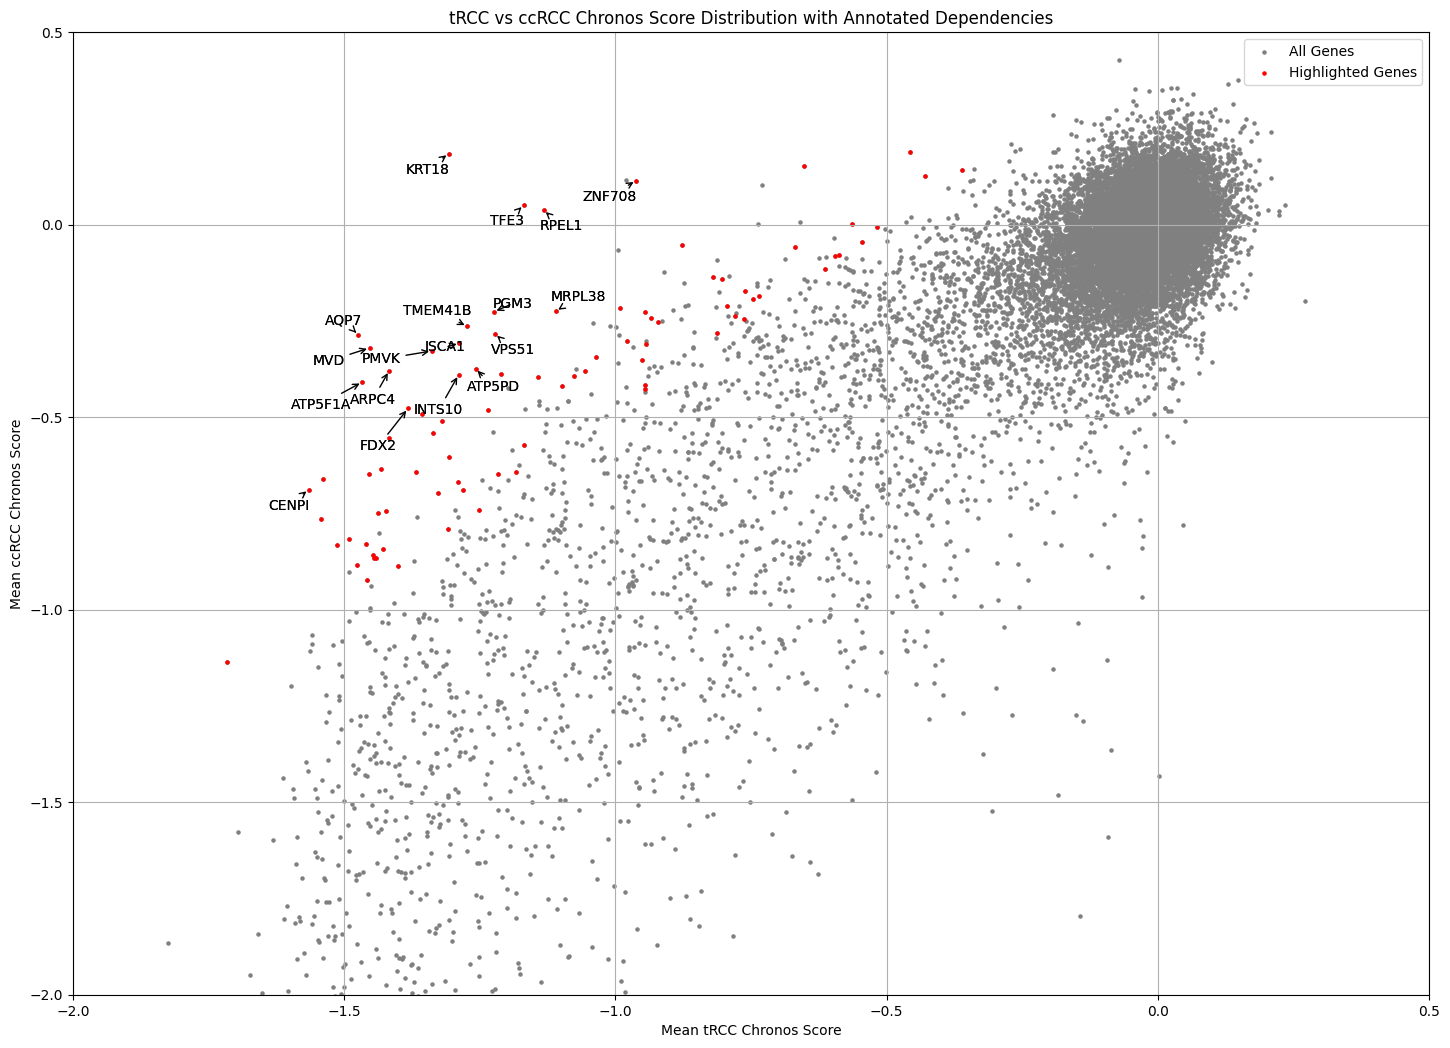

In [10]:
highlight_tRCC = mean_tRCC_chronos_gene_effects.loc[mean_sig_delta_chronos_df.index]
highlight_ccRCC = mean_ccRCC_chronos_gene_effects.loc[mean_sig_delta_chronos_df.index]

plt.figure(figsize=(17.5, 12.5))

plt.scatter(mean_tRCC_chronos_gene_effects, mean_ccRCC_chronos_gene_effects, s=5, label='All Genes', color='gray')
plt.scatter(highlight_tRCC, highlight_ccRCC, s=5, color='red', label='Highlighted Genes')

texts = []
gene_coords = {}
for gene in delta_chronos.index[:20]:
    if gene in mean_sig_delta_chronos_df.index:
        x = mean_tRCC_chronos_gene_effects.loc[gene]
        y = mean_ccRCC_chronos_gene_effects.loc[gene]
        gene_coords[gene] = (x, y)
        texts.append(plt.text(x, y, gene, ha='center', va='center'))

# Adjusting the text positions
adjust_text(texts, 
            force_points=(0.5, 0.5), 
            force_text=(0.5, 0.5), 
            expand_points=(1, 1), 
            expand_text=(1, 1))

# Now, annotate with arrows using the adjusted text positions
for text in texts:
    gene = text.get_text()
    x, y = gene_coords[gene]
    plt.annotate(text.get_text(),
                 xy=(x, y),
                 xytext=(text.get_position()[0], text.get_position()[1]),
                 arrowprops=dict(arrowstyle='->', color='black'),
                 ha='center', va='center')

plt.title('tRCC vs ccRCC Chronos Score Distribution with Annotated Dependencies')
plt.xlabel('Mean tRCC Chronos Score')
plt.ylabel('Mean ccRCC Chronos Score')
plt.xlim(-2, 0.5)
plt.ylim(-2, 0.5)
plt.grid(True)
plt.legend()
plt.show()


In [ ]:
def scale(column):
    column_mean = column.mean()
    column_std = column.std()
    return (column - column_mean) / column_std

neg_scaled_df = pd.concat([
    scale(FUUR1["neg|score"]),
    scale(STFE["neg|score"]),
    scale(UOK109["neg|score"]),
    scale(UOK146["neg|score"])
], axis=1)

neg_mean_df = pd.DataFrame({"mean_neg_score": neg_scaled_df.mean(axis=1)})

neg_mean_df.insert(0, 'gene_name', neg_mean_df.index)
neg_mean_df.reset_index(drop=True, inplace=True)

# neg_mean_df.columns = ['FUUR1', 'STFE', 'UOK109', 'UOK146']
# neg_mean_df['mean_neg_score'] = neg_mean_df.mean(axis=1)

neg_mean_df["mean_neg_score"] = np.log10(-neg_mean_df["mean_neg_score"])

# pos_mean_df = pd.concat([
#     FUUR1.sort_values("pos|score")["pos|score"], 
#     STFE.sort_values("pos|score")["pos|score"], 
#     UOK109.sort_values("pos|score")["pos|score"], 
#     UOK146.sort_values("pos|score")["pos|score"]
#     ], axis=1)

# pos_mean_df.columns = ['FUUR1', 'STFE', 'UOK109', 'UOK146']
# pos_mean_df['mean_pos_score'] = pos_mean_df.mean(axis=1)

# pos_mean_df = -np.log10(pos_mean_df.sort_values("mean_pos_score", ascending=True))

print(neg_mean_df) # Higher mean score means more negatively selective genes (genes confer cell death)
# print(pos_mean_df) # Higher mean score means more positively selective genes (genes confer cell proliferation)

In [ ]:
avanaGE = pd.read_csv("../datasets/avana/avana_ceres_gene_effects.csv", sep=",")
avanaGE.set_index('Unnamed: 0', inplace=True)

avanaLogFC = pd.read_csv("../datasets/avana/avana_sgRNA_logFCnorm.csv", sep=",")
avanaLogFC.set_index('Unnamed: 0', inplace=True)

avanaRC = pd.read_csv("../datasets/avana/avana_sgRNA_raw_readcounts.csv", sep=",")
avanaRC.set_index('Unnamed: 0', inplace=True)

In [ ]:
avanaGE

In [ ]:
avanaLogFC

In [ ]:
avanaRC

In [ ]:
GEMean_df = pd.DataFrame(avanaGE.mean(axis=1), columns=['meanGE'])
sorted_GEMean = GEMean_df.sort_values(by='meanGE', ascending=False)
sorted_GEMean

In [ ]:
# neg_mean_df = neg_mean_df.sort_values(by="mean_neg_score")

sorted_GEMean['ceres_rank'] = sorted_GEMean['meanGE'].rank()
print(sorted_GEMean)
merged_df = neg_mean_df.merge(sorted_GEMean, left_index=True, right_index=True, how='inner')

ceres_threshold = 0.0275 * len(merged_df)

filtered_df = merged_df[merged_df['ceres_rank'] > ceres_threshold]

essential_df = filtered_df.sort_values(by='mag_rank').head(20)

top_specific_genes = np.array(essential_df.index)

essential_df
# merged_df

In [ ]:
plt.figure(figsize=(12, 12))

plt.scatter(merged_df['meanGE'][:1000], merged_df['mean_neg_score'][:1000], color='blue', label='Common Tumour Essential Genes', alpha=0.5)

selected_genes_df = merged_df.loc[top_specific_genes]
plt.scatter(selected_genes_df['meanGE'], selected_genes_df['mean_neg_score'], color='red', label='TRCC Essential Genes')

texts = []  # Create an array to store the annotations

for gene, row in selected_genes_df.iterrows():
    annotation = plt.annotate(
        gene,
        (row['meanGE'], row['mean_neg_score']),
        fontsize=11,
        # xytext=(10, 10),  # Offset the text from the data point
        # textcoords='offset points',
        arrowprops=dict(
            arrowstyle="->",
            color='black',
            lw=0.5,
            connectionstyle="arc3,rad=0.15",  # Adjust this angle for arrow direction
            alpha=0.5,  # Adjust transparency
        )
    )
    texts.append(annotation)  # Append the annotation to the array

# Use adjust_text to avoid overlapping annotations
adjust_text(texts)

plt.xlabel('meanGE (CERES)')
plt.ylabel('Mean -log10(neg|score)')
plt.title('Comparison of Gene Essentiality: TRCC vs Common Tumour Essential Genes')
plt.legend()
plt.grid(True)

min_value = merged_df['meanGE'].min()
plt.xlim(min_value - 0.1 * abs(min_value), 0)

plt.tight_layout()
plt.show()




In [ ]:
neg_TRCC = pd.concat([
    FUUR1.sort_values("neg|score")["neg|score"], 
    STFE.sort_values("neg|score")["neg|score"], 
    UOK109.sort_values("neg|score")["neg|score"], 
    UOK146.sort_values("neg|score")["neg|score"]
    ], axis=1)

neg_TRCC.columns = ['FUUR1', 'STFE', 'UOK109', 'UOK146']

all_cell_lines = neg_TRCC.merge(avanaGE, left_index=True, right_index=True, how='inner')

def standardize_series(s):
    return (s - s.mean()) / s.std()

standardized_df = all_cell_lines.apply(standardize_series, axis=0)

df = standardized_df.drop(columns=['FUUR1', 'STFE', 'UOK109', 'UOK146'])

df_essential = df.loc[top_specific_genes]
cell_line_data = standardized_df[['FUUR1', 'STFE', 'UOK109', 'UOK146']].loc[top_specific_genes]

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(15, 15))

plt.suptitle('Comparison of Gene Essentiality Scores: TRCC (RRA lo) vs Common Tumours (CERES)', y=1.0)
plt.subplots_adjust(top=0.92)

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
cell_line_colors = {'FUUR1': '#9467bd', 'STFE': '#8c564b', 'UOK109': '#e377c2', 'UOK146': '#7f7f7f'}

for ax, (gene, row) in zip(axes.flatten(), df_essential.iterrows()):
    # Using boxplot from matplotlib for the distributions
    bp = ax.boxplot(row, positions=[1], patch_artist=True, vert=True) # Only one position for the box plot
    
    # Set colors for box plots and adjust outlier transparency
    for patch, color in zip(bp['boxes'], [colors[0]]):  # only one box, so use the first color
        patch.set_facecolor(color)
    for whisker in bp['whiskers']:
        whisker.set(color=colors[0], linewidth=1.2)
    for cap in bp['caps']:
        cap.set(color=colors[0], linewidth=1.2)
    for median in bp['medians']:
        median.set(color='black', linewidth=1.2)
    for flier in bp['fliers']:
        flier.set(markerfacecolor=colors[0], alpha=0.2)

    # Plotting the cell line data as dots
    x_values = [1] * len(cell_line_data.columns)  # Same X position for all points
    y_values = [cell_line_data[cell_line].loc[gene] for cell_line in cell_line_data.columns]
    for i, cell_line in enumerate(cell_line_data.columns):
        ax.scatter(x_values[i], y_values[i], color=cell_line_colors[cell_line], label=cell_line, alpha=1.0, s=50, edgecolor='black', zorder=2)  # Adjust s for dot size if needed

    # To avoid repeating legends for every subplot, we'll add the legend to just one subplot (like the first one).
    if ax == axes[0, 0]:  # First subplot
        ax.legend(loc='upper right', bbox_to_anchor=(1.075, 1))
        # ax.legend(loc='upper right', bbox_to_anchor=(1.05, 1))
    
    ax.set_title(gene)
    ax.set_ylabel('Standardized Gene Score', fontsize=10, labelpad=5)
    ax.set_xticks([1])  # Only one tick for the box plot
    ax.set_xticklabels([gene], rotation=0)
    ax.grid(True, linestyle='--', which='both', linewidth=0.5, alpha=0.5)

plt.subplots_adjust(wspace=-0.5)
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

FUUR1_df = -np.log10(FUUR1[["neg|score", "neg|p-value"]])
FUUR1_df["neg|p-value"] = -np.log10(FUUR1["neg|p-value"])
FUUR1_df["neg|score"] = -np.log10(FUUR1["neg|score"])
FUUR1_df = FUUR1_df.sort_values("neg|score", ascending=False)

plt.scatter(FUUR1_df[:1000]["neg|p-value"], FUUR1_df[:1000]["neg|score"], s=1)

texts = []
for id, gene in FUUR1_df.iterrows():
    if id in top_specific_genes:
        annotation = plt.annotate(
            id,
            (gene["neg|p-value"], gene["neg|score"]),
            fontsize=8,
            #  xytext=(-0.25, 0.1),
            textcoords='offset points',
            arrowprops=dict(
            arrowstyle="->",
            color='black',
            lw=0.5,
            connectionstyle="arc3,rad=0.15",  # Adjust this angle for arrow direction
            alpha=0.5,  # Adjust transparency
        )
        )
        texts.append(annotation)

# Use adjust_text to avoid overlapping annotations
adjust_text(texts)

plt.xlabel("-10log(p-value)")
plt.ylabel("Neg Selection Score (RRA lo)")
plt.title("FUUR1 Negative Selection Ranking")
plt.show()

In [ ]:
cell_lines = [FUUR1, STFE, UOK109, UOK146]
cell_line_names = ['FUUR1', 'STFE', 'UOK109', 'UOK146']

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))

for i, (cell_line_df, cell_line_name) in enumerate(zip(cell_lines, cell_line_names)):
    ax = axes[i // 2, i % 2]

    cell_line_data = -np.log10(cell_line_df[["neg|score", "neg|p-value"]])
    cell_line_data["neg|p-value"] = -np.log10(cell_line_df["neg|p-value"])
    cell_line_data["neg|score"] = -np.log10(cell_line_df["neg|score"])
    cell_line_data = cell_line_data.sort_values("neg|score", ascending=False)

    ax.scatter(
        cell_line_data[:1000]["neg|p-value"],
        cell_line_data[:1000]["neg|score"],
        s=1
    )

    texts = []
    for gene, row in cell_line_data.iterrows():
        if gene in top_specific_genes:
            annotation = ax.annotate(
                gene,
                (row["neg|p-value"], row["neg|score"]),
                fontsize=8,
                # xytext=(0.5, 0.5),
                # textcoords='offset points',
                arrowprops=dict(
                    arrowstyle="->",
                    color='black',
                    lw=0.5,
                    mutation_scale=1,
                    connectionstyle="arc3,rad=0.15",  # Adjust this angle for arrow direction
                    alpha=0.5,  # Adjust transparency
                )
            )
            texts.append(annotation)

    # Use adjust_text to avoid overlapping annotations
    adjust_text(texts, ax=ax, arrowprops=dict(arrowstyle="-", lw=0.5, alpha=0.5))

    ax.set_xlabel("-10log(p-value)")
    ax.set_ylabel("Neg Selection Score (RRA lo)")
    ax.set_title(f"{cell_line_name} Negative Selection Ranking")

plt.tight_layout()
plt.show()


In [ ]:
plt.scatter(negSortedUOK109[:2000]["neg|p-value"], -np.log10(negSortedUOK109[:2000]["neg|score"]), s=1)
plt.xlabel('Score P-value')
plt.ylabel("RRA Neg Score")
plt.title("UOK109 Negative Selection Ranking")
plt.show()

In [ ]:
plt.scatter(negSortedUOK146[:2000]["neg|p-value"], -np.log10(negSortedUOK146[:2000]["neg|score"]), s=1)
plt.xlabel('Score P-value')
plt.ylabel("RRA Neg Score")
plt.title("UOK146 Negative Selection Ranking")
plt.show()

In [ ]:
'''DepMap UOK101 Top 10 Preferentially Essential Genes'''

depmapGenes = ["SCD",
               "HNF1B",
               "KIF18B",
               "SCAP",
               "ANKFY1",
               "ERCC2",
               "DBF4",
               "ZFP36L1",
               "SLC15A3",
               "UBE2L3"]

geneResultsFUUR1 = []
for gene in depmapGenes:
    result = np.array(FUUR1[FUUR1["id"].isin([gene])])
    geneResultsFUUR1.append(result[0])

FUUR1Df = pd.DataFrame(geneResultsFUUR1, columns=FUUR1.columns)

geneResultsSTFE = []
for gene in depmapGenes:
    result = np.array(STFE[STFE["id"].isin([gene])])
    geneResultsSTFE.append(result[0])

STFEDf = pd.DataFrame(geneResultsSTFE, columns=STFE.columns)

geneResultsUOK109 = []
for gene in depmapGenes:
    result = np.array(UOK109[UOK109["id"].isin([gene])])
    geneResultsUOK109.append(result[0])

UOK109Df = pd.DataFrame(geneResultsUOK109, columns=UOK109.columns)

geneResultsUOK146 = []
for gene in depmapGenes:
    result = np.array(UOK146[UOK146["id"].isin([gene])])
    geneResultsUOK146.append(result[0])

UOK146Df = pd.DataFrame(geneResultsUOK146, columns=UOK146.columns)

FUUR1Df
STFEDf
UOK109Df
#UOK146Df